In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from datetime import datetime
import joblib
import pickle

In [2]:
df=pd.read_excel(r'E:\Data Analytics\Pyhton\Python Datas\Superstore.xlsx')
df

C:\Users\KUMAR COMPUTERS\anaconda3\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2018-152156,2018-11-08,2018-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2018-138688,2018-06-12,2018-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2017-108966,2017-10-11,2017-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2016-110422,2016-01-21,2016-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2019-121258,2019-02-26,2019-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
# 1. How would you check for and handle missing values in the dataset?
# 2. How can you identify duplicate orders or rows and remove them?
# 3. What data types would you expect for each column, and why?
# 4. How would you extract Year, Month, and Quarter from the Order Date column?
# 5. How would you calculate the number of unique customers?
# 6. How can you detect outliers in Sales or Profit columns?
# 📈 Descriptive Analytics
# 7. Find the total Sales, Quantity, and Profit for each Region.
# 8. Which Category has the highest total profit?
# 9. Find the top 5 cities contributing the most to total sales.
# 10. Identify the customer with the highest total sales.
# 11. Find the total orders and average sales per order.
# 12. Calculate profit margin = (Profit / Sales) * 100 for each transaction.
# 13. What percentage of total sales comes from each Segment?
# 14. Which Sub-Category has the lowest average profit?
# ⏱ Time-Series & Trend Analysis
# 15. Find the monthly sales trend for the last two years.
# 16. Calculate Year-over-Year (YoY) growth in sales.
# 17. Find the best and worst performing months based on profit.
# 18. Identify seasonal patterns or months with consistent high sales.
# 19. How would you calculate the Moving Average of monthly sales?
# 🧠 Customer & Product Insights
# 20. Who are the top 10 most profitable customers?
# 21. Which products have negative profit even with high sales?
# 22. How can you identify customers who ordered more than once in a year?
# 23. Find the most frequently sold Sub-Category in each region.
# 24. Determine the most popular shipping mode by total orders.
# 25. Which state has the highest average discount applied?
# 📉 Profitability & KPI Metrics
# 26. Calculate the overall profit-to-sales ratio (profit margin).
# 27. What is the average discount given per segment?
# 28. Find total profit loss due to discounts above 30%.
# 29. Identify high-profit, low-sales items vs. low-profit, high-sales items (using segmentation logic).
# 30. Build a dashboard showing Region, Category, and Profit comparison with trend lines.

In [4]:
# 1. How would you check for and handle missing values in the dataset?
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [5]:
# 2. How can you identify duplicate orders or rows and remove them?
df.duplicated().sum()

np.int64(0)

In [6]:
# 3. What data types would you expect for each column, and why?
df.dtypes.reset_index()

,index,0
0,Row ID,int64
1,Order ID,object
2,Order Date,datetime64[ns]
3,Ship Date,datetime64[ns]
4,Ship Mode,object
5,Customer ID,object
6,Customer Name,object
7,Segment,object
8,Country,object
9,City,object


In [4]:
# 4. How would you extract Year, Month, and Quarter from the Order Date column?
df['Year'] = df['Order Date'].dt.year
df['Month no'] = df['Order Date'].dt.month
df['Months'] = df['Order Date'].dt.month_name()
df['Quarter'] = 'Qtr ' + df['Order Date'].dt.quarter.astype(str)

In [8]:
# 5. How would you calculate the number of unique customers?
s=df['Customer Name'].nunique()
print('Unique',s)

Unique 793


In [9]:
# 6. How can you detect outliers in Sales or Profit columns?


In [10]:
# 7. Find the total Sales, Quantity, and Profit for each Region.
df.groupby(['Region'])[['Sales','Profit','Quantity']].sum().reset_index().round(2)

,Region,Sales,Profit,Quantity
0,Central,501239.89,39706.36,8780
1,East,678781.24,91522.78,10618
2,South,391721.90,46749.43,6209
3,West,725457.82,108418.45,12266


In [11]:
# 8. Which Category has the highest total profit?
df.groupby(['Category'])['Profit'].sum().reset_index().nlargest(1,'Profit').round(2)

,Category,Profit
2,Technology,145454.95


In [12]:
# 9. Find the top 5 cities contributing the most to total sales.
df.groupby(['City'])['Sales'].sum().reset_index().nlargest(5,'Sales').round(2)

,City,Sales
329,New York City,256368.16
266,Los Angeles,175851.34
452,Seattle,119540.74
438,San Francisco,112669.09
374,Philadelphia,109077.01


In [13]:
# 10. Identify the customer with the highest total sales.
df.groupby(['Customer Name'])['Sales'].sum().reset_index().nlargest(2,'Sales').round(2)

,Customer Name,Sales
686,Sean Miller,25043.05
730,Tamara Chand,19052.22


In [14]:
# 11. Find the total orders and average sales per order.
df.groupby(['Order ID'])['Sales'].mean().reset_index().round(2)

,Order ID,Sales
0,CA-2016-100006,377.97
1,CA-2016-100090,349.60
2,CA-2016-100293,91.06
3,CA-2016-100328,3.93
4,CA-2016-100363,10.69
...,...,...
5004,US-2019-168802,18.37
5005,US-2019-169320,85.72
5006,US-2019-169488,28.43
5007,US-2019-169502,56.70


In [15]:
# 12. Calculate profit margin = (Profit / Sales) * 100 for each transaction.
df['Margin'] = (df['Profit']/df['Sales'])*100
df['Margin'].reset_index()

,index,Margin
0,0,16.00
1,1,30.00
2,2,47.00
3,3,-40.00
4,4,11.25
...,...,...
9989,9989,16.25
9990,9990,17.00
9991,9991,7.50
9992,9992,45.00


In [16]:
# 13. What percentage of total sales comes from each Segment?
s=df.groupby(['Segment'])['Sales'].sum().reset_index()
s['Total Sls'] = s['Sales'].sum()
s['Sls %'] = (s['Sales']/s['Total Sls'])*100
s.round(2)

,Segment,Sales,Total Sls,Sls %
0,Consumer,1161401.34,2297200.86,50.56
1,Corporate,706146.37,2297200.86,30.74
2,Home Office,429653.15,2297200.86,18.70


In [17]:
# 14. Which Sub-Category has the lowest average profit?
df.groupby(['Sub-Category'])['Profit'].mean().reset_index().nsmallest(2,'Profit').round()

,Sub-Category,Profit
16,Tables,-56.0
4,Bookcases,-15.0


In [18]:
# ⏱ Time-Series & Trend Analysis
# 15. Find the monthly sales trend for the last two years.
month=df[df['Order Date'].dt.year.isin([2018,2019])]
sls=month.groupby(['Year','Month no','Months'])['Sales'].sum().reset_index()
sls.drop(columns='Month no').round(2)

,Year,Months,Sales
0,2018,January,18542.49
1,2018,February,22978.82
2,2018,March,51715.88
3,2018,April,38750.04
4,2018,May,56987.73
5,2018,June,40344.53
6,2018,July,39261.96
7,2018,August,31115.37
8,2018,September,73410.02
9,2018,October,59687.74


In [61]:
# 15. Find the monthly sales trend for the last two years. with pivot table
year=df[df['Order Date'].dt.year.isin([2018,2019])]
month=year.groupby(['Year','Month no','Months'])['Sales'].sum().reset_index()
month.pivot(index='Months',columns='Year',values='Sales').reset_index().round(2)

Year,Months,2018,2019
0,April,38750.04,36521.54
1,August,31115.37,63120.89
2,December,96999.04,83829.32
3,February,22978.82,20301.13
4,January,18542.49,43971.37
5,July,39261.96,45264.42
6,June,40344.53,52981.73
7,March,51715.88,58872.35
8,May,56987.73,44261.11
9,November,79411.97,118447.82


In [72]:
# 15. Find the monthly sales trend for the last two years. with pivot table  2
year=df[df['Order Date'].dt.year.isin([2018,2019])]
month=year.groupby(['Year','Month no','Months'])['Sales'].sum().reset_index()
month.pivot(index='Year',columns=['Month no','Months'],values='Sales').reset_index().round(2)

Month no,Year,1,2,3,4,5,6,7,8,9,10,11,12
Months,,January,February,March,April,May,June,July,August,September,October,November,December
0,2018,18542.49,22978.82,51715.88,38750.04,56987.73,40344.53,39261.96,31115.37,73410.02,59687.74,79411.97,96999.04
1,2019,43971.37,20301.13,58872.35,36521.54,44261.11,52981.73,45264.42,63120.89,87866.65,77776.92,118447.82,83829.32


In [20]:
# 16. Calculate Year-over-Year (YoY) growth in sales.
year=df.groupby(['Year'])['Sales'].sum().reset_index()
year['YoY'] = year['Sales'].shift(1)
year['Growth'] = year['Sales'].pct_change()*100
year.round(2)

,Year,Sales,YoY,Growth
0,2016,484247.50,NaN,NaN
1,2017,470532.51,484247.50,-2.83
2,2018,609205.60,470532.51,29.47
3,2019,733215.26,609205.60,20.36


In [21]:
# 17. Find the best and worst performing months based on profit.
df.groupby(['Month no','Months'])['Profit'].sum().reset_index().nlargest(3,'Profit').round(2)

,Month no,Months,Profit
11,12,December,43369.19
8,9,September,36857.48
10,11,November,35468.43


In [20]:
# 18. Identify seasonal patterns or months with consistent high sales.
year=df[df['Order Date'].dt.year==2018]
month=year.groupby(['Month no','Months'])['Sales'].sum().reset_index()
month
month=month.drop(columns='Month no').round(2)
month

,Months,Sales
0,January,18542.49
1,February,22978.82
2,March,51715.88
3,April,38750.04
4,May,56987.73
5,June,40344.53
6,July,39261.96
7,August,31115.37
8,September,73410.02
9,October,59687.74


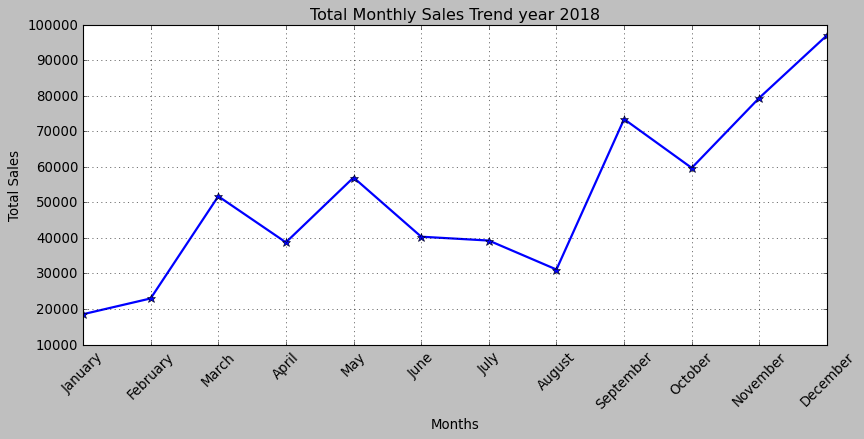

In [27]:
from matplotlib import style
plt.figure(figsize=(12,5))
plt.plot(month['Months'],month['Sales'],color='blue',marker='*',markersize=8,linewidth=2)
plt.xlabel('Months')
plt.ylabel('Total Sales')
plt.title('Total Monthly Sales Trend year 2018')
style.use('classic')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [35]:
# 19. How would you calculate the Moving Average of monthly sales?
month=df.groupby(['Month no','Months'])['Sales'].sum().reset_index()
month['rolling Month'] = month['Sales'].rolling(window=3).mean()
month.round(2)

,Month no,Months,Sales,rolling Month
0,1,January,94924.84,NaN
1,2,February,59751.25,NaN
2,3,March,205005.49,119893.86
3,4,April,137762.13,134172.96
4,5,May,155028.81,165932.14
5,6,June,152718.68,148503.21
6,7,July,147238.10,151661.86
7,8,August,159044.06,153000.28
8,9,September,307649.95,204644.04
9,10,October,200322.98,222339.00


In [38]:
# 🧠 Customer & Product Insights
# 20. Who are the top 10 most profitable customers?
df.groupby(['Customer Name'])['Profit'].sum().reset_index().nlargest(5,'Profit').round(2)

,Customer Name,Profit
730,Tamara Chand,8981.32
622,Raymond Buch,6976.10
671,Sanjit Chand,5757.41
334,Hunter Lopez,5622.43
6,Adrian Barton,5444.81


In [49]:
# 21. Which products have negative profit even with high sales?
product=df.groupby(['Product Name'])[['Sales','Profit']].sum().reset_index()
sls=product[product['Profit']<0].nlargest(3,'Sales').round(2)
sls

,Product Name,Sales,Profit
444,Cisco TelePresence System EX90 Videoconferenci...,22638.48,-1811.08
683,GBC DocuBind P400 Electric Binding System,17965.07,-1878.17
813,High Speed Automatic Electric Letter Opener,17030.31,-262.00


In [58]:
# 22. How can you identify customers who ordered more than once in a year?
year=df[df['Order Date'].dt.year==2018]
sls=year.groupby(['Customer Name'])['Sales'].count().reset_index()
finle=sls[sls['Sales']>1]
finle

,Customer Name,Sales
0,Aaron Bergman,2
2,Aaron Smayling,2
3,Adam Bellavance,9
4,Adam Hart,6
5,Adam Shillingsburg,8
...,...,...
633,William Brown,16
634,Xylona Preis,9
635,Yoseph Carroll,3
636,Zuschuss Carroll,9


In [84]:
# 23. Find the most frequently sold Sub-Category in each region.
sls=df.groupby(['Region'])['Sub-Category'].value_counts().groupby(level=0).head(1).reset_index()
sls

,Region,Sub-Category,count
0,Central,Binders,366
1,East,Binders,440
2,South,Binders,246
3,West,Binders,471


In [97]:
# 24. Determine the most popular shipping mode by total orders.
df.groupby(['Ship Mode'])['Order ID'].count().reset_index().nlargest(1,'Order ID')

,Ship Mode,Order ID
3,Standard Class,5968


In [110]:
# 25. Which state has the highest average discount applied?
sls=df.groupby(['State'])['Discount'].mean()*100
sls.reset_index().nlargest(3,'Discount').round(2)

,State,Discount
11,Illinois,39.00
41,Texas,37.02
36,Pennsylvania,32.86


In [ ]:
# 📉 Profitability & KPI Metrics
# 26. Calculate the overall profit-to-sales ratio (profit margin).

In [116]:
# 27. What is the average discount given per segment?
pr=df.groupby(['Segment'])['Discount'].mean()*100
sls=pr.reset_index().round(2)
sls

,Segment,Discount
0,Consumer,15.81
1,Corporate,15.82
2,Home Office,14.71


In [126]:
# 28. Find total profit loss due to discounts above 30%.
fl=df[df['Discount']>=0.3]
total=fl.groupby(['Region','Category'])['Profit'].sum().reset_index().round(2)
total

,Region,Category,Profit
0,Central,Furniture,-19512.43
1,Central,Office Supplies,-30539.04
2,Central,Technology,-2340.80
3,East,Furniture,-17923.96
4,East,Office Supplies,-5971.64
5,East,Technology,-18193.00
6,South,Furniture,-8840.78
7,South,Office Supplies,-8404.47
8,South,Technology,-7635.23
9,West,Furniture,-8200.58


In [137]:
# 29. Identify high-profit, low-sales items vs. low-profit, high-sales items (using segmentation logic).
df.groupby(['Product Name'])[['Sales','Profit']].sum().reset_index().sort_values(by=['Sales','Profit'],ascending=(False,True)).round(2)

,Product Name,Sales,Profit
404,Canon imageCLASS 2200 Advanced Copier,61599.82,25199.93
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.38,7753.04
444,Cisco TelePresence System EX90 Videoconferenci...,22638.48,-1811.08
786,HON 5400 Series Task Chairs for Big and Tall,21870.58,0.00
686,GBC DocuBind TL300 Electric Binding System,19823.48,2233.51
...,...,...,...
253,Avery Hi-Liter Pen Style Six-Color Fluorescent...,7.70,3.16
784,Grip Seal Envelopes,7.07,2.39
1793,Xerox 20,6.48,3.11
208,Avery 5,5.76,2.82


In [158]:
# 29. Identify high-profit, low-sales items vs. low-profit, high-sales items (using segmentation logic).
sls=df.groupby(['Product Name'])[['Sales','Profit']].sum().reset_index()
sls['Rank'] = sls['Sales'].rank(method='dense',ascending=False)
sls['Rank2'] = sls['Profit'].rank(method='dense',ascending=True)
sls=sls[(sls['Rank']<=1) | (sls['Rank2']<=1)].round(2)
sls

,Product Name,Sales,Profit,Rank,Rank2
404,Canon imageCLASS 2200 Advanced Copier,61599.82,25199.93,1.0,1844.0
475,Cubify CubeX 3D Printer Double Head Print,11099.96,-8879.97,23.0,1.0


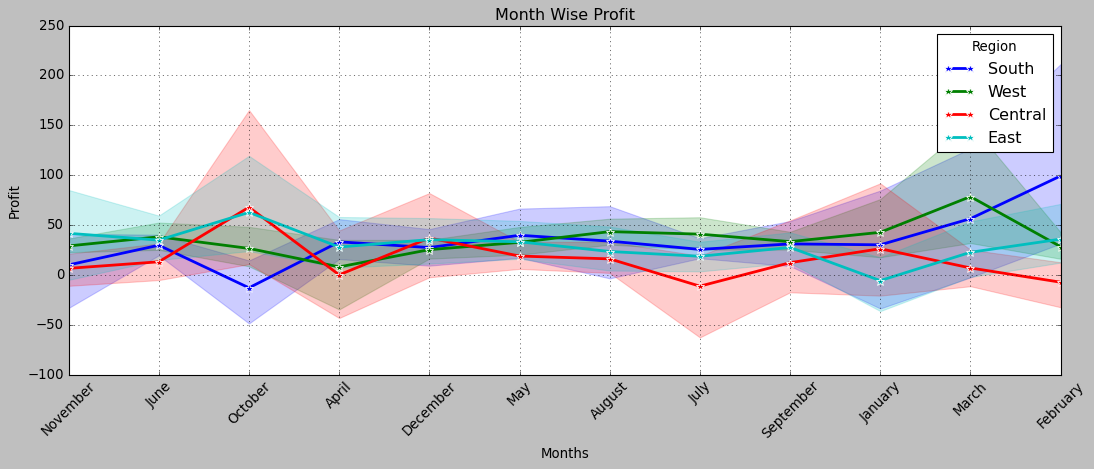

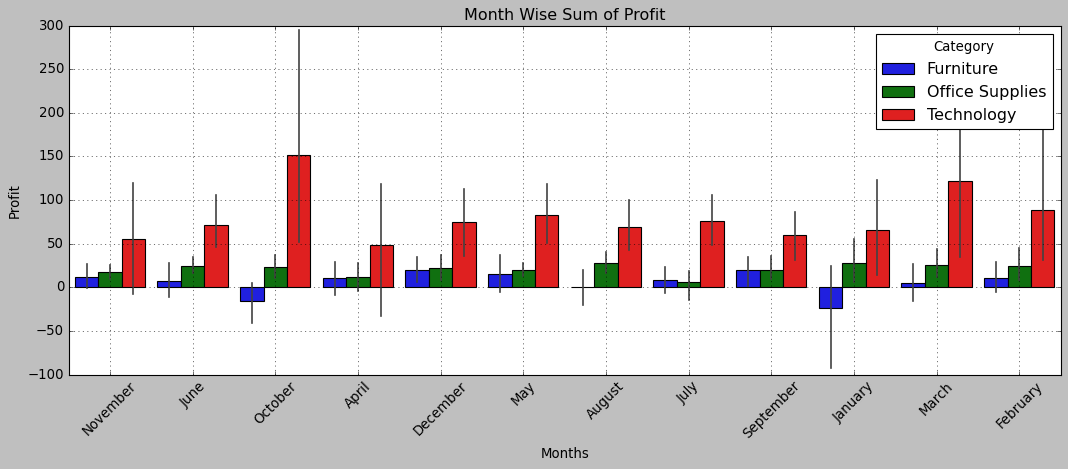

<Figure size 640x480 with 0 Axes>

In [204]:
# 30. Build a dashboard showing Region, Category, and Profit comparison with trend lines.
region_profit=df.groupby(['Months'])['Profit'].sum().reset_index()
category_profit=df.groupby("Months")["Profit"].sum().reset_index()

#1. region-wise monthly profit trend
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
sn.lineplot(data=df,x='Months',y='Profit',color='green',linewidth=2.5,marker='*',markersize=8,hue='Region')
plt.xlabel('Months')
plt.ylabel('Profit')
plt.title('Month Wise Profit')
plt.grid()
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(16,12))
plt.subplot(2,1,2)
sn.barplot(data=df,x='Months',y='Profit',width=0.85,hue='Category')
plt.xlabel('Months')
plt.ylabel('Profit')
plt.title('Month Wise Sum of Profit')
plt.grid()
plt.xticks(rotation=45)
plt.show()

plt.tight_layout()
plt.show()


In [135]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year',
       'Month no', 'Months', 'Quarter'],
      dtype='object')